In [1]:
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt

In [35]:
#[x, y, w, h]
f1=open("D:\\Documentos\\LIIARPI\\Anemia\\Base_de_Datos\\validcrop.txt","r")
lines=f1.readlines()
print(lines)

[' 1366.5100 1.456510e+03\n', ' 711.9800 2.399800e+02\n', ' 99.0000 1anemia-100.jpg\n', ' 501.5100 2.764510e+03\n', ' 947.9800 4.919800e+02\n', ' 99.0000 1anemia-101.jpg\n', ' 1407.5100 1.312510e+03\n', ' 1097.9800 5.579800e+02\n', ' 99.0000 1anemia-102.jpg\n', ' 1490.5100 1.460510e+03\n', ' 627.9800 1.999800e+02\n', ' 99.0000 1anemia-103.jpg\n', ' 2414.5100 1.860510e+03\n', ' 827.9800 5.079800e+02\n', ' 99.0000 1anemia-104.jpg\n', ' 1926.5100 1.492510e+03\n', ' 567.9800 3.039800e+02\n', ' 99.0000 1anemia-106.jpg\n', ' 1718.5100 1.200510e+03\n', ' 1019.9800 6.719800e+02\n', ' 99.0000 1anemia-107.jpg\n', '\n', ' 1131.5100 1.570510e+03\n', ' 605.9800 3.539800e+02\n', ' 99.0000 1anemia-108.jpg\n', ' 1251.5100 2.188510e+03\n', ' 785.9800 4.799800e+02\n', ' 99.0000 1anemia-109.jpg\n', ' 951.5100 2.020510e+03\n', ' 905.9800 4.619800e+02\n', ' 99.0000 1anemia-110.jpg\n', ' 1437.5100 1.396510e+03\n', ' 779.9800 5.639800e+02\n', ' 99.0000 1anemia-111.jpg\n', ' 189.5100 1.570510e+03\n', ' 839.98

In [71]:
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn.shape

(2784,)

In [72]:
linesn=linesn.reshape(-1,3)
linesn

array([[' 1366.5100 1.456510e+03\n', ' 711.9800 2.399800e+02\n',
        ' 99.0000 1anemia-100.jpg\n'],
       [' 501.5100 2.764510e+03\n', ' 947.9800 4.919800e+02\n',
        ' 99.0000 1anemia-101.jpg\n'],
       [' 1407.5100 1.312510e+03\n', ' 1097.9800 5.579800e+02\n',
        ' 99.0000 1anemia-102.jpg\n'],
       ...,
       [' 843.5100 1.360510e+03\n', ' 713.9800 4.379800e+02\n',
        ' 110.0000 o_vars-839.jpg\n'],
       [' 1011.5100 1.984510e+03\n', ' 779.9800 4.619800e+02\n',
        ' 110.0000 o_vars-840.jpg\n'],
       [' 729.5100 1.228510e+03\n', ' 815.9800 3.059800e+02\n',
        ' 110.0000 o_vars-841.jpg\n']], dtype='<U26')

In [92]:
#ca=np.full((3,1),'c')
np.full((linesn.shape[0],1),'c')
#lines[:,2]='c'+lines[:,2][9:]
#np.full((linesn.shape[0],1),'c')+linesn[:,2][9:]
linesn[:,2]
def replace_err(data):
    return np.concatenate((data[:2],np.array(['c'+data[2][9:]])),axis=0)
v_replace_err=np.vectorize(replace_err,signature="(n)->(m)")
linesnc=v_replace_err(linesn)
print(linesnc)
replace_err(linesn[0,:])

[[' 1366.5100 1.456510e+03\n' ' 711.9800 2.399800e+02\n'
  'c1anemia-100.jpg\n']
 [' 501.5100 2.764510e+03\n' ' 947.9800 4.919800e+02\n'
  'c1anemia-101.jpg\n']
 [' 1407.5100 1.312510e+03\n' ' 1097.9800 5.579800e+02\n'
  'c1anemia-102.jpg\n']
 ...
 [' 843.5100 1.360510e+03\n' ' 713.9800 4.379800e+02\n'
  'c o_vars-839.jpg\n']
 [' 1011.5100 1.984510e+03\n' ' 779.9800 4.619800e+02\n'
  'c o_vars-840.jpg\n']
 [' 729.5100 1.228510e+03\n' ' 815.9800 3.059800e+02\n'
  'c o_vars-841.jpg\n']]


array([' 1366.5100 1.456510e+03\n', ' 711.9800 2.399800e+02\n',
       'c1anemia-100.jpg\n'], dtype='<U26')

In [146]:
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
print(linesnc)
print(xywh)
print(imgnames)

[[' 1366.5100 1.456510e+03' ' 711.9800 2.399800e+02' 'c1anemia-100.jpg']
 [' 501.5100 2.764510e+03' ' 947.9800 4.919800e+02' 'c1anemia-101.jpg']
 [' 1407.5100 1.312510e+03' ' 1097.9800 5.579800e+02' 'c1anemia-102.jpg']
 ...
 [' 843.5100 1.360510e+03' ' 713.9800 4.379800e+02' 'c o_vars-839.jpg']
 [' 1011.5100 1.984510e+03' ' 779.9800 4.619800e+02' 'c o_vars-840.jpg']
 [' 729.5100 1.228510e+03' ' 815.9800 3.059800e+02' 'c o_vars-841.jpg']]
[[' 1366.5100 1.456510e+03' ' 711.9800 2.399800e+02']
 [' 501.5100 2.764510e+03' ' 947.9800 4.919800e+02']
 [' 1407.5100 1.312510e+03' ' 1097.9800 5.579800e+02']
 ...
 [' 843.5100 1.360510e+03' ' 713.9800 4.379800e+02']
 [' 1011.5100 1.984510e+03' ' 779.9800 4.619800e+02']
 [' 729.5100 1.228510e+03' ' 815.9800 3.059800e+02']]
['c1anemia-100.jpg' 'c1anemia-101.jpg' 'c1anemia-102.jpg'
 'c1anemia-103.jpg' 'c1anemia-104.jpg' 'c1anemia-106.jpg'
 'c1anemia-107.jpg' 'c1anemia-108.jpg' 'c1anemia-109.jpg'
 'c1anemia-110.jpg' 'c1anemia-111.jpg' 'c1anemia-112.jpg

In [161]:
def no_spaces(data):
    f=np.array(data[0].split(" ")[1:]+data[1].split(" ")[1:])
    return np.array([f])
v_no_spaces=np.vectorize(pyfunc=no_spaces,signature="(m)->(k)")
print(no_spaces(xywh[0,:]))
xywh=v_no_spaces(xywh)

[['1366.5100' '1.456510e+03' '711.9800' '2.399800e+02']]


In [173]:
print(float(xywh.reshape(1,-1)[0][0]))
a=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
a.reshape(-1,4)

1366.51


array([[1366.51, 1456.51,  711.98,  239.98],
       [ 501.51, 2764.51,  947.98,  491.98],
       [1407.51, 1312.51, 1097.98,  557.98],
       ...,
       [ 843.51, 1360.51,  713.98,  437.98],
       [1011.51, 1984.51,  779.98,  461.98],
       [ 729.51, 1228.51,  815.98,  305.98]])

In [ ]:
f2=open("D:\\Documentos\\LIIARPI\\Anemia\\Base_de_Datos\\validcrop1.txt","w")

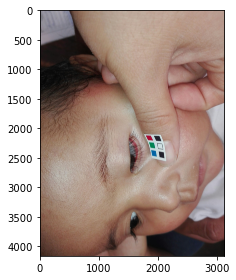

NameError: name 'morphology' is not defined

In [8]:
di='D:\Documentos\LIIARPI\Anemia\Base_de_Datos\Imagenes_Originales\c1anemia-100.jpg'
img = io.imread(di)

